**Materiály vznikají průběžně a jsou bez záruky - prosím o report chyb :-)**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import binom, factorial
import sys; sys.path.append('zdrojaky')
from ping import *

# Téma 4: Náhodná veličina

**Jak vlastně koukáme na to, co padne na kostce?**

...že bychom vlastně dělali v hlavě nějakou transformaci, aniž si to uvědomujeme?

![nvkostka](img/nv-kostka2.jpg)

---

**Házíme dvěma mincemi, zajímají nás případy 2x orel, mix, 2x panna**


|$\omega$ | PP | PO | OP | OO|
|---|---|---|---|---|
|$P(\omega)$ | $\frac{1}{4}$ |  $\frac{1}{4}$ | $\frac{1}{4}$ | $\frac{1}{4}$ |

OK, takže pro 3 zajímavé případy s pstmi $\frac{1}{4}, \frac{1}{2}, \frac{1}{4}$ musíme počítat se čtyřmi jevy. A ještě zapisovat, že nehomogenní výsledek *mix* je vlastně ze dvou případů (když nás to vůbec nezajímá).

A co když budeme mít mincí tisíc a budou nás zajímat jevy "samé panny", "samí orli", "vše ostatní"? My nechceme dělat kombinatoriku...

---

**Ping na server**

Pingáme server a rozdělujeme si ping do kategorií:


| čas odezvy (ms) | [0, 10) | [10, 20) | [20, 30) | ... | [100, 110) | ... | bez návratu |
|---|---|---|---|---|---|---|---|
|Počet | 12 | 32 | 433| ... | 322 | ... | 13 |
|Pst | 0.05 | 0.08 | 0.21 | ... | 0.19 | ... | 0.05 |

- Když budeme chtít vědět, kolik pingů je menších než 95ms, tak se upíšeme.
- A co teprve, když budeme chtít jemnější dělení do více kategorií
- ...třeba při nekonečně jemném dělení - což neumíme - ale můžeme jít po jednotlivých milisekundách, a to už je dost.

## Náhodná veličina - na jevy elegantně

> **Definice: Náhodná veličina (reálná)**
>
> Buď $(\Omega, \mathcal{F}, P)$ pravděpodobnostní prostor a $(\mathbb{R},\mathcal{B})$ prostor reálných čísel vybavený $\sigma$-algebrou $\mathcal{B}$. Náhodná veličina $X$ je měřitelná funkce $X:\Omega \to \mathbb{R}$ taková, že pro každou množinu $B\in\mathcal{B}$ je její vzor $X^{-1}(B) \in \mathcal{F}$, kde $X^{-1}(B)=\{w: X(\omega)\in B\}$.

**Na přednášce jste mohli dostat definici jinou. Bude ekvivalentní, držte se formalismu z přednášek.**

**Co to tedy máme v uvedené definici?**

- $(\Omega, \mathcal{F}, P)$ už známe, to je pravděpobnostní prostor. V $\Omega$ najdeme všechny elementární jevy, v $\sigma$-algebře (co to je?) $\mathcal{F}$ všechny jevy (vč. neelementárních), které nás zajímají a $P$ je pravděpodobnostní míra.
- $(\mathbb{R},\mathcal{B})$ je něco podobného, akorát tu máme reálná čísla (množina $\mathbb{R}$), a $\mathcal{B}$ je $\sigma$-algebra generovaná všemi otevřenými množinami na $\mathbb{R}$ (tzv. borelovská). I singleton - tedy jediné číslo - je množina v $\mathcal{B}$. Kontrolní otázka: patří do $\mathcal{B}$ uzavřené množiny? (definice $\sigma$-algebry dává odpověď).
- Podle definice náhodná veličina $X$ zobrazuje $\Omega$ na $\mathbb{R}$. Třeba symboly kostky na {1,...,6}.
- Podle definice, když si z $\mathcal{B}$ vezmu nějakou množinu, tak jejím vzorem pod $X$ - tedy $X^{-1}(B)$ - je nějaká množina v $\sigma$-algebře $\mathcal{F}$. Takže k výroku "Padla šestka" si každý domyslí "šest puntíků", provede si inverzní zobrazení z 6 žijící v $\mathcal{B}$ na ty puntíky v $\mathcal{F}$. Ne vždy je to takhle jednoduché, ale pro představu by to mělo stačit.

**Co to tedy je, ta náhodná veličina?**
- **jednoduše:** je to způsob, jak si zjednodušit počítání s jevy, neboť přiřazuje číselné označení jevům. Vezmeme-li dny v roce jako elementární jevy, určitě je pohodlnější uvažovat {1,...,365} než {1.1. - 30.12.} A jde to dál, prostřední den v roce vidíme rovnou, že je 183. Ale kdo ví, který to je datumově? ;)
- **pěkně:** je to měřitelné zobrazení z $\Omega$ na množinu reálných čísel vybavených rovněž $\sigma$-algebrou (borelovskou).

### Příklady:

1. **Kostka** - to už jsme rozebrali výše, ale představme si třeba, že házíme na "sudá čísla" a "lichá čísla" a nic jiného. Jak bychom mohli zavést náhodnou veličinu? A co ty $\sigma$ algebry na obou stranách zobrazení?
2. **2 mince z příkladu výše** - jak bychom zavedli náhodnou veličinu? Kolik bude mít hodnot? A co $\sigma$-algebry?
3. **Příklad s pingem výše** - jak bychom se postarali o nekonečné dělení času odezvy?

> **Definice: Diskrétní náhodná veličina**
>
> Náhodná veličina $X$ se nazývá **diskrétní**, jestliže nabývá hodnot z nějaké nejvýše spočetné množiny $\{x_1, x_2,\ldots\} \subset \mathbb{R}$.

**Úkol: Vymyslete pár příkladů na diskrétní náhodnou veličinu.**

### Příklad - ping

Podíváme se ještě jednou na ping (ICMP Echo Request), pro jednoduchost si situaci rozdělíme na dva případy - *úspěch* a *neúspěch*, podle toho, zda se vrátila odpověď (ICMP Echo Reply). Bude celkem rozumné si označit:
- 0 - odpověď nepřišla, $\omega_1$,
- 1 - odpověď přišla, $\omega_2$.

Máme tedy **náhodnou veličinu** o dvou hodnotách:
$$
X(\omega) = X =
\begin{cases}
0 & \text{neúspěch},\\
1 & \text{úspěch}.
\end{cases}
$$

$\sigma$-algebry si sestavte za domácí úkol. Jdeme pingat server a vykreslíme si absolutní a relativní četnosti.

Prvních 10 pingů:  [1 1 1 1 1 0 1 0 0 0]
Neúspěchů: 291
Úspěchů: 709


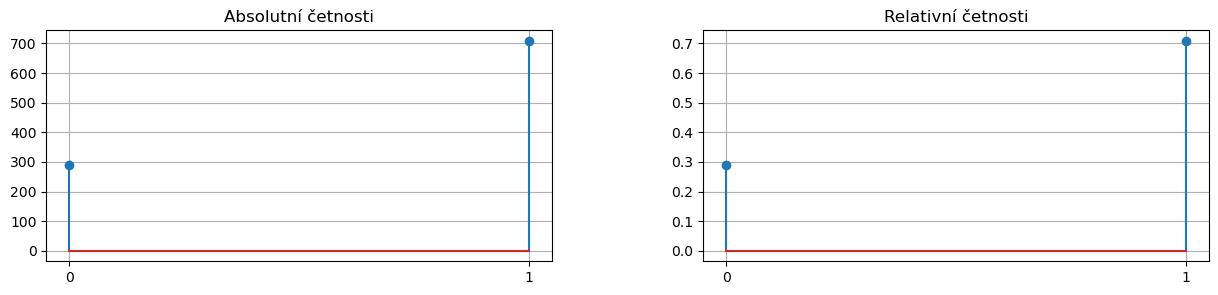

In [24]:
npings = 1000
X = ping_server(npings)
print('Prvních 10 pingů: ', X[:10])
X0 = np.sum(X==0)
X1 = np.sum(X==1)
print(f'Neúspěchů: {X0}\nÚspěchů: {X1}')
plt.figure(figsize=(15,3))
plt.subplot(121)
plt.stem([X0, X1])
plt.xticks([0, 1])
plt.title('Absolutní četnosti')
plt.subplot(122)
plt.stem([X0/npings, X1/npings])
plt.xticks([0, 1])
plt.title('Relativní četnosti')
plt.show()

Vezmeme-li pravděpodobnost $P(X = x)$ jako funkci $x$, potom mluvíme o **pravděpodobnostní funkci** či **diskrétní hustotě** náhodné veličiny $X$. Platí, že $P(X=x)=0$ pro $x\ne x_k$ kde $k=1,2,\ldots$ I proto jsou mezi tykadly v obrázku nuly, stejně jako všude jinde. Onen obrázek vpravo je **empirická** pravděpodobnostní funkce, k **teoretické** - o které bude **vždy** řeč - bychom se dostali v limitě odhadem z nekonečně mnoha dat.

Pravděpodobnostní funkce je anglicky [probability mass function (pmf)](https://en.wikipedia.org/wiki/Probability_mass_function).

### 1 ping (jeden pokus)
Odhadneme si nyní pravděpodobnost, že nastane úspěch v jednom pingu:

In [23]:
p = X1/npings
print(f"Odhadnutá pravděpodobnost z {npings} dat je p={p:.3f}.")

Odhadnutá pravděpodobnost z 1000 dat je p=0.694.


Připomeňme, že náhodnou veličinu pro jeden pokus (ping) jsme zavedli takto:
$$
X(\omega) = X =
\begin{cases}
0 & \text{neúspěch},\\
1 & \text{úspěch}.
\end{cases}
$$

Čemu je rovná pravděpodobnost, že $X=1$ a $X=0$?

$$
\begin{aligned}
P(X=1) &= p, \\
P(X=0) &= 1-p.
\end{aligned}
$$

Spojme to nyní do jednoho vzorečku - jak?

$$
P(X=x) = p^x(1-p)^{1-x}\qquad\text{(ověřte)}.
$$

Máme tedy **kompletní předpis pro pravděpodobnostní funkci veličiny $X$** a víme, že bude platit pro všechny experimenty, které mohou vyústit ve dva stavy, jimž můžeme přidělit 0 a 1, a které jsou determinovány jen pravděpodobností $p$. Takovéhle případy, resp. náhodné veličiny, mají **Bernoulliho (též alternativní) rozdělení s parametrem $p$** a píšeme

$$
X \sim \mathrm{Be}(p), \qquad p\in[0,1].
$$

Někdy se píše Ber(p), jindy Bernoulli(p), někdy se do závorky dává i náhodná veličina, tedy Bernoulli(X; p), na tom nesejde.

### Ping ještě jednou - $n$ pokusů, $k$ úspěchů

To už jsme vlastně ozkoušeli před chvílí v simulaci. Odvoďme, jak bude vypadat převděpodobnost, že při $n$ pokusech o ping dostaneme $k$ úspěchů. Nyní máme $X=k$ a $n$ pokusů.

1. V $n$ pokusech nastane s pravděpodobností $p$ úspěch $k$-krát, tedy celkem je to $p^k$.
2. Současně ale musí nastat $n-k$ neúspěchů, to je celkem $(1-p)^{n-k}$.
3. Pro $k$ úspěchů v $n$ pokusech existuje celá řada kombinací, konkrétně $\binom{n}{k}$.
4. Když to dáme všechno dohromady, dostaneme

$$
P(X=k) = \binom{n}{k} p^k (1-p)^{n-k}.
$$

A tím jsme se dostali k druhému rozdělení, jež chceme znát - **binomické rozdělení s parametry $n\in\mathbb{N}$ a $p\in[0,1]$**. Udává pravděpodobnost $k$ úspěchů v $n$ pokusech s pstí úspěchu $p$.

Toto rozdělení je ohromně užitečné. Podívejme se např. na $n=20$ pingů při různých pravděpodobnostech úspěchu $p$ - tu zkusme měnit:

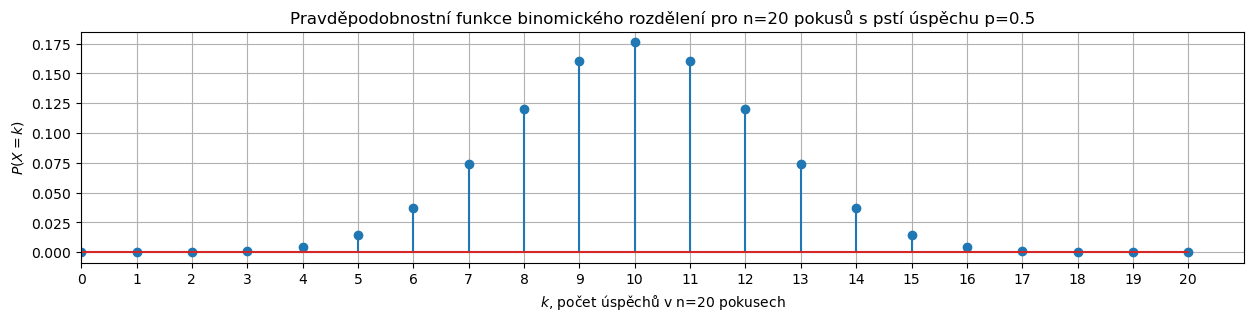

In [22]:
n = 20
p = 0.5
k = np.arange(0, n+1)

def p_X(n, k, p):
    return binom(n, k) * p**k * (1-p)**(n-k)

P_X_k = p_X(n, k, p)
plt.figure(figsize=(15,3))
plt.stem(P_X_k)
plt.xlabel(rf'$k$, počet úspěchů v n={n} pokusech')
plt.ylabel(r'$P(X=k)$')
plt.title(f'Pravděpodobnostní funkce binomického rozdělení pro n={n} pokusů s pstí úspěchu p={p}')
plt.xticks(np.arange(n+1))
plt.xlim(left=0)
plt.show()

Podívejme se ještě na jeden zajímavý graf - kumulativní:

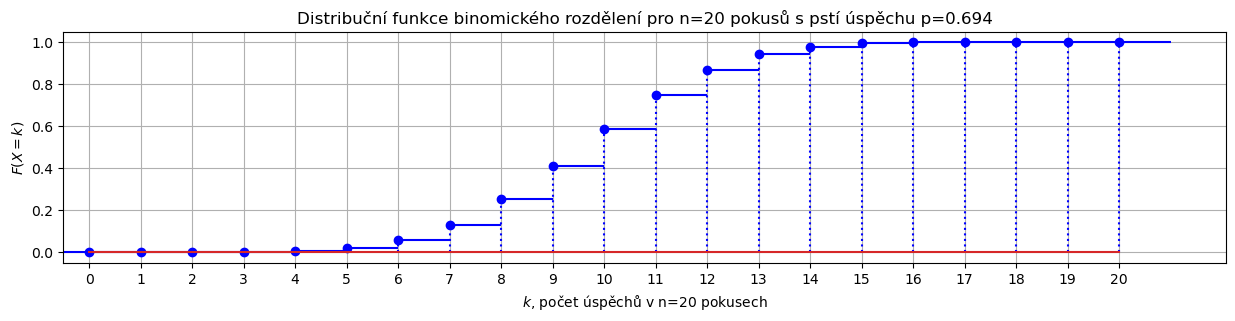

In [26]:
F_X = P_X_k.cumsum()

plt.figure(figsize=(15,3))
plt.hlines(0, xmin=k[0]-.5, xmax=k[0], colors='b')
for i in range(n+1):
    plt.hlines(F_X[i], xmin=k[i], xmax=k[i]+1, colors='b')
plt.stem(F_X, linefmt=':b')
plt.xlim(left=-0.5)
plt.xticks(np.arange(n+1))
plt.xlabel(rf'$k$, počet úspěchů v n={n} pokusech')
plt.ylabel(r'$F(X=k)$')
plt.title(f'Distribuční funkce binomického rozdělení pro n={n} pokusů s pstí úspěchu p={p}')
plt.show()

Poslední uvedený graf říká, jaká je pravděpodobnost, že náhodná veličina $X$ nabývá hodnot rovných nebo menších než $x$. A to je vlastně distribuční funkce (angl. [cummulative distribution function, cdf](https://en.wikipedia.org/wiki/Cumulative_distribution_function))

> **Definice: Distribuční funkce**
>
> Distribuční funkce náhodné veličiny $X$ je funkce definovaná vztahem
>
> $$
F(x) = P(X\leq x).
$$

A jaké má vlastnosti? Pečlivě si je rozmyslete, jsou přímočaré:

> **Věta: Vlastnosti distribuční funkce**
>
> Distribuční funkce $F$ náhodné veličiny $X$ má následující vlastnosti:
> 1. $\lim_{x\to -\infty} F(x) = 0$,
> 2. $\lim_{x\to \infty} F(x) = 1$,
> 3. distribuční funkce je neklesající,
> 4. distribuční funkce je zprava spojitá, $\lim_{y\to x^+} F(y) = F(x)$.

Z příkladu navíc plyne, že pro diskrétní případy platí

$$
F(x) = P(X\leq x) = \sum_{x_k \leq x}P(X=x_k).
$$

Současně vidíme, že pro $x_a < x_b$ je $P(X \in(x_a, x_b]) = F(x_b) - F(x_a)$, viz obrázek:
![cdf](img/cdf-interval.png)

### Co by nás ještě mohlo zajímat?

Rozhodně by nás u pingu zajímalo, jaká je "průměrná"  nebo lépe řečeno **očekávaná** úspěšnost. Podívejme se na to následovně:

1. Máme $n$ pokusů a $k \leq n$ úspěchů. A pro každé $X=k$ máme pravděpodobnost danou pravděpodobnostní funkcí $P(X=k)$, viz obrázek.
2. Každá z těch pravděpodobností $P(X=k)$ je vlastně relativní vahou jevu $X=k$. A tyto váhy se sumují do jedné.
3. Tak uděláme vážený průměr :)

In [27]:
EX = np.sum(P_X_k * k)
print(f'EX = {EX:.2f}')

EX = 10.00


Tento "*teoretický vážený průměr*" není nic jiného, než tzv. **střední hodnota** (někdy též očekávaná hodnota, angl. [expected value, expectation](https://en.wikipedia.org/wiki/Expected_value)).

> **Definice: Střední hodnota diskrétní náhodné veličiny**
>
> Střední hodnota diskrétní náhodné veličiny je definována vztahem
>
>$$
\operatorname{E}X = \sum_k x_k P(X=x_k).
$$

Střední hodnota nemusí existovat a ani nemusí být konečná, ale do takových detailů na cvičení zabíhat nebudeme. Docela fajn je už teď vědět, že aritmetický průměr konverguje ke střední hodnotě. Ta je totiž hodnotou **teoretickou** (dosažitelnou v limitě), zatímco aritmetický průměr **empirickou** (spočítanou z omezeného počtu dat). Trochu předběhněme v semestru a rovnou si řekněme, že **aritmetický průměr je odhadem střední hodnoty** (což ovšem neplatí bez výjimek).

Poslední statistickou mírou, kterou se budeme nyní zabývat, je variance, neboli rozptyl (angl. [variance](https://en.wikipedia.org/wiki/Variance)). Ta říká, jak moc jsou data koncentrována či rozptýlena okolo střední hodnoty.

> **Definice: Rozptyl (variance)**
>
> Rozptyl náhodné veličiny $X$ je definován
>
> $$
\operatorname{var} X = \operatorname{E}(X - \operatorname{E} X)^2 = \operatorname{E}X^2 - (\operatorname{E}X)^2.
$$

Střední hodnota je tzv. **první obecný moment** (první mocnina $x_k$ a nevztahujeme k $\operatorname{E}X$). Variance je **druhý centrální moment** (druhá mocnina a vztahujeme k $\operatorname{E}X$, tj. centru). Často mluvíme jen o momentech, většinou je jasné, který myslíme.

Pro příklad s pingem:

In [28]:
EX2 = np.sum(P_X_k * k**2)
varX = EX2 - EX**2
print(f'var(X) = {varX:.2f}')

var(X) = 5.00


Prozradíme si rovnou, že pro běžná rozdělení už nám někdo odvodil i vzorečky pro střední hodnotu a rozptyl. V případě binomického to je:

$$
\operatorname{E}X = np, \qquad \operatorname{var}X=np(1-p).
$$

**Vykresleme si tedy definitivní podobu pravděpodobnostní funkce Bi(n,p) se zvýrazněnou střední hodnotou:**

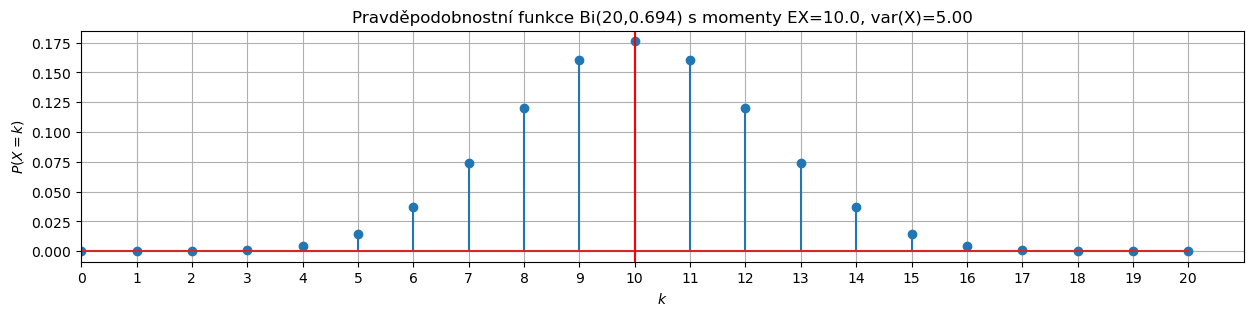

In [31]:
plt.figure(figsize=(15,3))
plt.stem(P_X_k)
plt.xlabel(r'$k$')
plt.ylabel(r'$P(X=k)$')
plt.title(f'Pravděpodobnostní funkce Bi({n},{p}) s momenty EX={EX}, var(X)={varX:.2f}')
plt.xticks(np.arange(n+1))
plt.xlim(left=0)
plt.axvline(EX, 0, 1, color='red')
plt.show()

## Další rozdělení

Už jen stručně o dalších zajímavých rozděleních.

### Geometrické rozdělení $X\sim \mathrm{Geom}(p)$

#### Random loadbalancing

Uvažujme náhodný loadbalancing - master server rozděluje úlohy na 6 podřízených nodů tak, že pro každou nově příchozí úlohu (např. elektronickou platbu) náhodně vybere jeden z nodů a úlohu jí předá. Jelikož zpracování se děje okamžitě, není nutné sledovat zatížení a v každém jednotlivém okamžiku jsou k dispozici všechny nody. S jakou pravděpodobností bude 6. node zpracovávat až 10. úlohu?

_[Nápověda: je to stejné, jako pst že šestka padne na kostce až v desátém hodu ;)]_

*Řešení: Pravděpodobnost vybrání 6. nodu je $p=\frac{1}{6}$. A ten má být z $k=10$ pokusů $9\times$ nevybrán a pak vybrán, tedy*

$$
P(X=10) = \left(1-\frac{1}{6}\right)^9 \cdot \frac{1}{6}.
$$

#### Teoretizujme...

Máme tedy případ, kdy s pravděpodobností $p$ nastává úspěch a chtějme modelovat, že nastane až v $k$tém pokusu. To znamená, že předchází $(k-1)$ neúspěšných pokusů s pravděpodobností $(1-p)$ - vzpomínáte např. na příklady s urnou?

Pro pravděpodobnostní funkci tedy platí

$$
P(X=k) = (1-p)^{k-1} p, \qquad k=1,2,\ldots
$$

Střední hodnota a rozptyl jsou dány vzorci

$$
\operatorname{E}X = \frac{1}{p}, \qquad \operatorname{var}X=\frac{1}{p}\left(\frac{1}{p}-1\right).
$$

Podívejme se na graf této funkce:

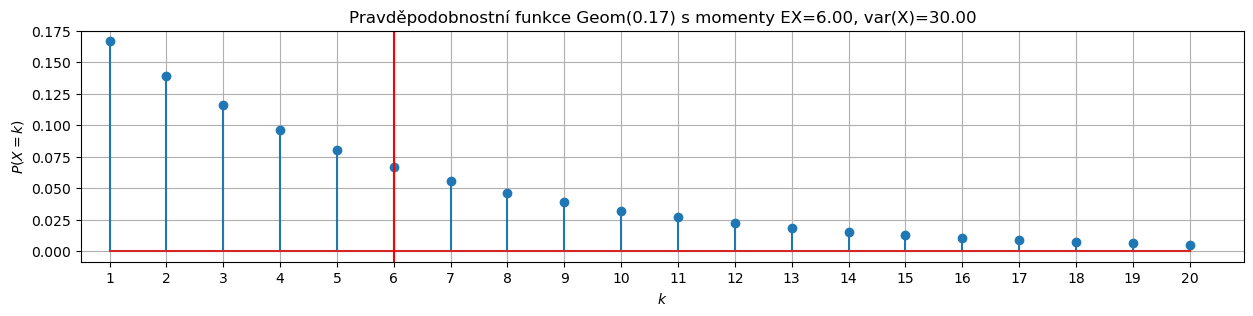

In [32]:
p = 1/6

max_k = 20
k = np.arange(1, max_k+1)
P_X_k = (1-p)**(k-1) * p
EX = 1/p
varX = 1/p * (1/p - 1)

plt.figure(figsize=(15,3))
plt.stem(np.arange(1,max_k+1), P_X_k)
plt.xlabel(r'$k$')
plt.ylabel(r'$P(X=k)$')
plt.title(f'Pravděpodobnostní funkce Geom({p:.2f}) s momenty EX={EX:.2f}, var(X)={varX:.2f}')
plt.xticks(np.arange(1,max_k+1))
plt.xlim(left=.5)
plt.axvline(EX, 0, 1, color='red')
plt.show()

Geometrické rozdělení má jednu pěknou vlastnost - nemá paměť. Dole na to je příklad, nyní se spokojme s odpovědí na otázku: jaká je pravděpodobnost, že mi nyní na kostce padne šestka, když na ní předtím padlo 1,3,3 (nebo samá sudá čísla, nebo samá lichá, nebo tisíc jedniček).

### Diskrétní rovnoměrné rozdělení $X\sim U(a, b)$

Diskrétní rovnoměrné rozdělení má jako parametry dvě celá čísla $a, b$, mezi nimiž leží $n=b-a+1$ celých čísel. Každé z nich, tedy $k\in\{a, a+1, \ldots, b-1, b\}$ má stejnou pravděpodobnost, čili pravděpodobnostní funkce je dána předpisem

$$
P(X=k) = \frac{1}{n}, \qquad n=b-a +1.
$$

Pro momenty platí

$$
\operatorname{E}X = \frac{a+b}{2}, \qquad \operatorname{var}X=\frac{(b-a+1)^2-1}{12}.
$$

Toto rozdělení tedy přisuzuje všem možným realizacím stejnou pravděpodobnost. Nenechme se mást jeho jednoduchostí, použití rovnoměrného rozdělení v praxi dokáže být pravým peklem ;)

Pravděpodobnostní funkce je vcelku nudná:

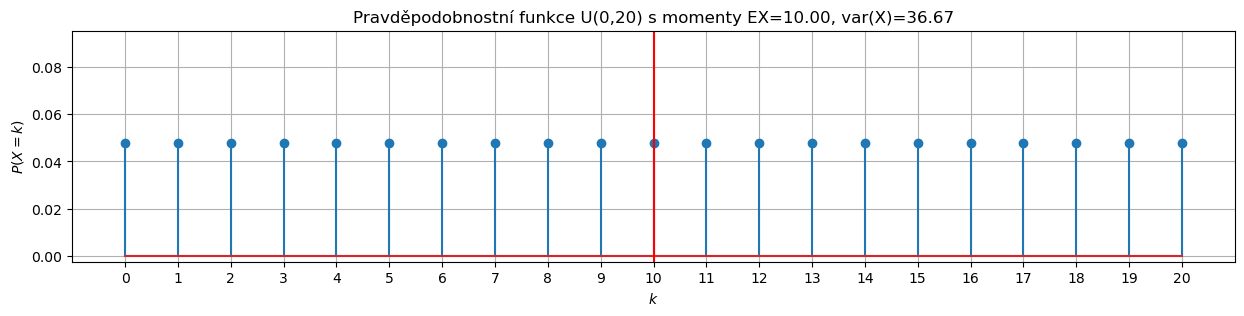

In [33]:
a = 0
b = 20

k = np.arange(a, b+1)
P_X_k = np.ones_like(k) * 1/(b-a+1)
EX = (a + b)/2
varX = ((b-a+1)**2 - 1)/12

plt.figure(figsize=(15,3))
plt.stem(P_X_k)
plt.xlabel(r'$k$')
plt.ylabel(r'$P(X=k)$')
plt.title(f'Pravděpodobnostní funkce U({a},{b}) s momenty EX={EX:.2f}, var(X)={varX:.2f}')
plt.xticks(np.arange(n+1))
plt.ylim(top=2*P_X_k[0])
plt.axvline(EX, 0, 1, color='red')
plt.show()

Rovnoměrné rozdělení měla pravděpodobnost výběru každého ze šesti nodů v předchozím příkladě ;) Férová kostka je rovnoměrná, stejně tak mince.

### Poissonovo rozdělení $X\sim \mathrm{Po}(\lambda)$

[Poissonovo rozdělení](https://en.wikipedia.org/wiki/Poisson_distribution), též rozdělení řídkých jevů, má parametr $\lambda>0$, též nazývaný četnost (rate). Poissonovská veličina popisuje počet $k\in\mathbb{N}_0$ realizací určitého jevu (např. úspěchu), přičemž tyto realizace jsou naprosto nezávislé. Rozdělení je velmi blízké binomickému, ale předpokládá výrazně větší počet pokusů než realizací (úspěchů). Obecně platí pravidlo, že binomické rozdělení s $n\geq 20$ a současně $p\leq 0.05$ lze dobře aproximovat Poissonovým rozdělením s $\lambda=np$. Proto ta "řídkost".

Pravděpodobnostní funkce: 

$$P(X=k) = \frac{\lambda^k e^{-\lambda}}{k!}.$$

Momenty:

$$
\operatorname{E}X = \operatorname{var}X = \lambda.
$$

Rozdělení je populární pro popis počtu telefonních hovorů v call centru za jednotku času, počet vozidel jež projedou daným místem za jednotku času, nebo počet rozpadů radioaktivního materiálu za jednotku času.

Nakreslíme si pravděpodobnostní funkci:

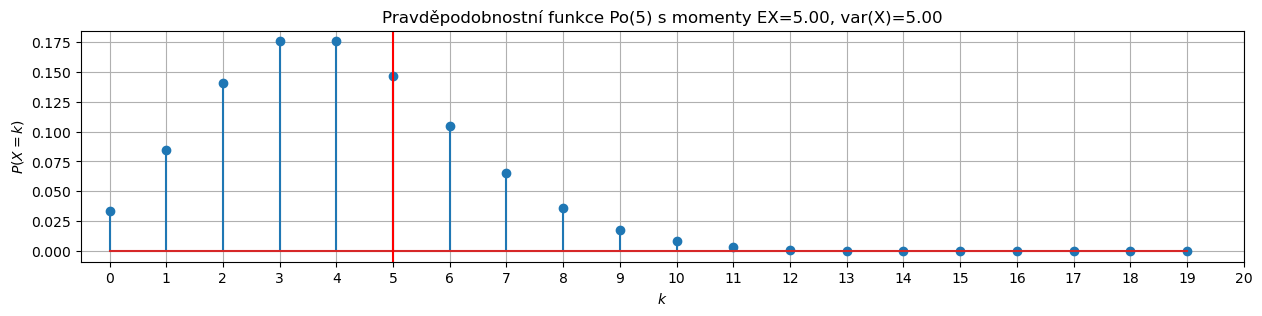

In [36]:
max_k = 20
lambd = 5

k = np.arange(1, max_k+1)
P_X_k = lambd**k * np.exp(-lambd) / factorial(k)
EX = lambd
varX = lambd

plt.figure(figsize=(15,3))
plt.stem(P_X_k)
plt.xlabel(r'$k$')
plt.ylabel(r'$P(X=k)$')
plt.title(f'Pravděpodobnostní funkce Po({lambd}) s momenty EX={EX:.2f}, var(X)={varX:.2f}')
plt.xticks(np.arange(n+1))
plt.xlim(left=-0.5)
plt.axvline(EX, 0, 1, color='red')
plt.show()

## Přehled vybraných diskrétních distribucí

Následující tabulka obsahuje souhrn uvedených distribucí, jejich vlastností, link na wikipedii a odkazy do [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html), které přímo obsahuje náhodné generátory, počítá momenty atd. atd. ;)

| Rozdělení | Parametry rozdělení | $P(X=k)$ | $\operatorname{E}X$ | $\operatorname{var}X$ | `scipy.stats` |
|---|---|---|---|---|---|
|[Bernoulliho](https://en.wikipedia.org/wiki/Bernoulli_distribution) | $p\in[0,1]$ | $p^{k} (1-p)^{(1-k)}$ | $p$ | $p(1-p)$ | [`bernoulli`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bernoulli.html#scipy.stats.bernoulli) |
|[Binomické](https://en.wikipedia.org/wiki/Binomial_distribution) | $n\in\mathbb{N}, p\in[0,1]$ | $\binom{n}{k}p^k (1-p)^{n-k}$ | $np$ | $np(1-p)$ | [`binom`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html#scipy.stats.binom)|
|[Geometrické](https://en.wikipedia.org/wiki/Geometric_distribution)| $p\in[0,1]$ | $(1-p)^{k-1}p$ | $\frac{1}{p}$ | $\frac{1}{p}\left(\frac{1}{p}-1\right)$ | [`geom`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.geom.html#scipy.stats.geom)|
|[Poissonovo](https://en.wikipedia.org/wiki/Poisson_distribution#Related_distributions)| $\lambda>0$ | $\frac{\lambda^k e^{-\lambda}}{k!}$| $\lambda$ | $\lambda$ | [`poisson`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html#scipy.stats.poisson)|
|[Rovnoměrné disk.](https://en.wikipedia.org/wiki/Discrete_uniform_distribution)| $a,b\in\mathbb{Z}$ |$\frac{1}{b-a+1}$| $\frac{a+b}{2}$ |$\frac{(b-a+1)^2-1}{12}$ | [`randint`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.randint.html#scipy.stats.randint) |

Ještě by stálo za to, kdyby se horlivý student podíval na **multinomické** - to by umělo rozdělit náš ping do více kategorií (např. odezva žádná - pomalá - rychlá - superrychlá). Je blízce příbuzné binomickému a velmi jednoduché.\|

### Poznámka závěrem:

Na začátku jsme počítali ze simulovaných dat - byla to pravděpodobnost $p$ Bernoulliho rozdělení, graf empirických četností atd. Trochu si v tom udělejme pořádek. Výběr je jen vzorkem populace, výběrové charakteristiky nám zpravidla konvergují k teoretickým, daným distribucí (to se ještě časem dozvíme).

| Výběrová charakteristika | Teoretická charakteristika |
|---|---|
| Průměr, výběrová střední hodnota | střední hodnota |
| Výběrová variance, výběrový rozptyl  | rozptyl |
| Výběrová pstní funkce | pravděpodobnostní funkce |
| Výběrová distribuční funkce | distribuční funkce |
| Výběrové momenty | momenty |

A takto bychom mohli pokračovat. Ale asi se už ujasnilo, že teoretické charakteristiky jsou vlastnosti distribuce, popisující celou populaci, zatímco výběrové jsou z výběru z této distribuce. (Ono je to navíc ještě mnohem složitější :))

---

---

# Příklady ze cvičení

### 4.1 Buď $F$ distribuční funkce náhodné veličiny $X$. Graficky znázorněte následující vlastnosti:

- $P(X>x) = 1 - F(x)$,
- $P(x<X\leq y) = F(y) - F(x)$,
- $P(X=x) = F(x) - \lim_{y\to x^-} F(y)$

*Řešení: lehké, prostě kreslit, navíc viz přednáška.*

### 4.2 Házíme stejnou mincí dvakrát po sobě. Uvažujeme náhodnou veličinu $X$ udávající, kolik hlav padlo při daném dvojhodu.

**Načrtněte graf distribuční funkce náhodné veličiny $X$, jestliže**

**a) je mince férová (viz přednáška)**

**b) je mince falešná, tj. $P(H) = p \in (0,1)$.**

*Řešení: stačí napočítat pravděpodobnosti pro $k=0,1,2$ úspěchy. Řešení je v obrázku.*

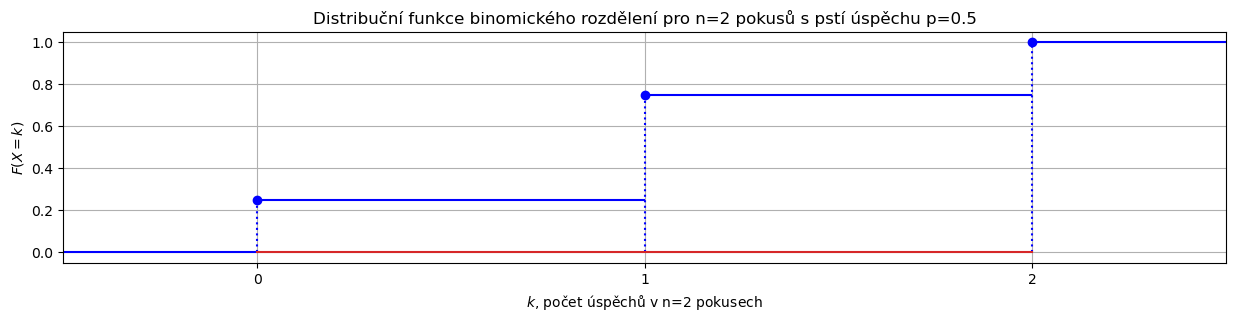

In [38]:
n = 2
p = 0.5

k = np.arange(n+1)
P_X_k = p_X(n, k, p)
F_X = P_X_k.cumsum()

plt.figure(figsize=(15,3))
plt.hlines(0, xmin=k[0]-.5, xmax=k[0], colors='b')
for i in range(n+1):
    plt.hlines(F_X[i], xmin=k[i], xmax=k[i]+1, colors='b')
plt.stem(F_X, linefmt=':b')
plt.xlim(-.5, 2.5)
plt.xticks(np.arange(n+1))
plt.xlabel(rf'$k$, počet úspěchů v n={n} pokusech')
plt.ylabel(r'$F(X=k)$')
plt.title(f'Distribuční funkce binomického rozdělení pro n={n} pokusů s pstí úspěchu p={p}')
plt.show()

### 4.3 Uvažujme stejnou situaci, jako v příkladu 4.2. Načrtněte graf pravděpodobnostní funkce $P(X=x)$ náhodné veličiny $X$ pro oba případy.

*Řešení - analogicky :)*

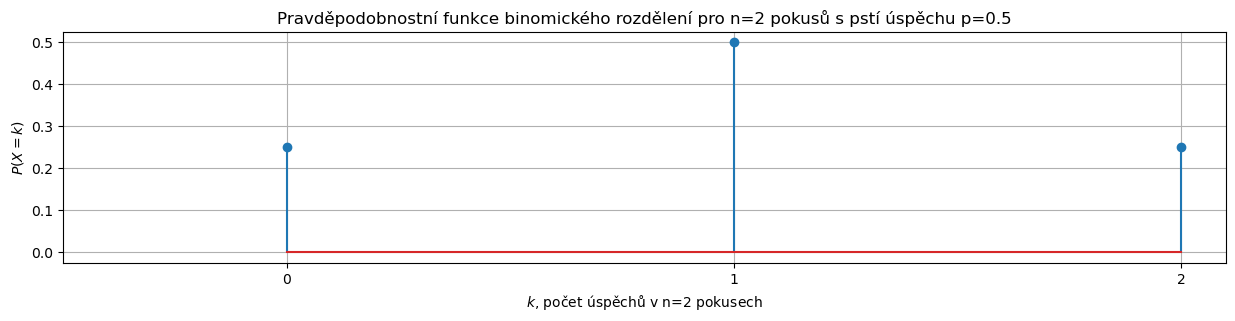

In [39]:
n = 2
p = 0.5

k = np.arange(0, n+1)
P_X_k = p_X(n, k, p)
plt.figure(figsize=(15,3))
plt.stem(P_X_k)
plt.xlabel(rf'$k$, počet úspěchů v n={n} pokusech')
plt.ylabel(r'$P(X=k)$')
plt.title(f'Pravděpodobnostní funkce binomického rozdělení pro n={n} pokusů s pstí úspěchu p={p}')
plt.xticks(np.arange(n+1))
plt.xlim(left=-0.5)
plt.show()

### 4.4 Automobil má na trase do garáže 3 semafory. Na každém z nich nezávisle na ostatních svítí zelená s pravděpodobností 2/3 a červená s pravděpodobností 1/3. Určete rozdělení pravděpodobnosti náhodné veličiny $X$ udávající počet semaforů, které automobil projede před prvním zastavením.

*Řešení:*

- *ani jeden* - $P(X=0) = \frac{1}{3}$,
- *právě jeden* - $P(X=1) = \frac{2}{3} \cdot \frac{1}{3} = \frac{2}{9}$,
- *právě dva* - $P(X=2) = \frac{2}{3} \cdot\frac{2}{3} \cdot \frac{1}{3} = \frac{4}{27}$,
- *všechny tři* - $P(X=3) = \frac{2}{3} \cdot \frac{2}{3} \cdot\frac{2}{3} = \frac{8}{27}$.

### 4.5 Určete střední hodnotu a rozptyl náhodné veličiny z příkladu 4.2, jestliže $P(H) = \frac{1}{3}$.

*Řešení:*

*Buď si můžeme otrocky napočítat jednotlivé pravděpodobnosti a dosadit jako níže:*
- $P(X=0) = \frac{4}{9}$,
- $P(X=1) = \frac{4}{9}$,
- $P(X=2) = \frac{1}{9}$

$$
\begin{aligned}
\operatorname{E}X &= \sum_{k=1}^2 k P(X=k) = \frac{2}{3} = n\cdot p = 2 \cdot \frac{1}{3}, \\
\operatorname{var}X &= np(1-p) = \frac{4}{9}.
\end{aligned}
$$

*Snadno si uvědomíme, že jde o binomickou veličinu a jen dosadíme do příslušných vzorečků. Pokud ne, postupujeme podle definice stř. hodnoty a rozptylu, výsledky jsou identické.*

### 4.6 Určete střední hodnou a rozptyl náhodné veličiny z příkladu 4.4.

*Řešení:*

*Vezmeme hodnoty z příkladu, spočítáme podle vzorce o střední hodnotě a rozptylu snadným dosazením:*

$$
\begin{aligned}
\operatorname{E}X &= \frac{38}{27}, \\
\operatorname{var}X &= \frac{1094}{729}.
\end{aligned}
$$

*Pozor na to, že geometrické rozdělení uvažuje $k\in\mathbb{N}$, zatímco my jsme omezeni na $k\in\{1,2,3\}.$*

### 4.7

**a) Načrtněte graf distribuční a pravděpodobnostní funkce rovnoměrně rozdělené náhodné veličiny nabývající hodnot {-5, 0, 1, 3}**

*V každém bodě bude poměrná část pravděpodobnostní míry. Standardně ale uvažujeme rovnoměrno u posloupnosti celých čísel.*

**b) Ukažte, že náhodná veličina nabývající spočetné množiny hodnot nemůže mít rovnoměrné rozdělení.**

*Řešení: Uvažujme náhodnou veličinu $X$ s hodnotami $\{x_1,\ldots,x_\infty\}$. Potom:*

$$
\sum_{k=1}^\infty P(X=x_k) =
\begin{cases}
0 &\Leftrightarrow P(X=x_k) = 0,\\
\infty &\Leftrightarrow P(X=x_k) > 0.
\end{cases}
$$

V obou případech je dosažen spor s normalizační podmínkou $\sum_{k=1}^\infty P(X=x_k) = 1$.

### 4.8 Tento příklad se měl změnit, musím kouknout na novou verzi.

### 4.9 Při hře "Člověče, nezlob se" čekáme na nasazení figurky, tzn. než padne šestka. Jako náhodnou veličinu $T$ uvažujme počet hodů, které musíme provést.

**a) Jaké rozdělení má veličina $T$?**

*Geometrické s $p=\frac{1}{6}$.*

**b) Jaký je očekávaný počet potřebných hodů?**

$\operatorname{E}T = 1/p = 6$.

**c) Jaká je pravděpodobnost nasazení při druhém hodu, tj. $P(T=2)?$**

$P(T=2) = (1-p)^{k-1} p = \frac{5}{36}$.

**d) Jaká je pravděpodobnost nenasazení ani při třetím hodu, tj. $P(T>3)?$**

$(1-p)^3 = \left(\frac{5}{6}\right)^3$

**e) Jaká je pravděpodobnost nasazení při pátém hodu, jestliže ani ve třetím kole nebylo nasazeno, tj. $P(T=5|T>3)$?**

$$
P(T=5|T>3) = \frac{P(\{T=5\}\cap\{T>3\})}{P(T>3)} = \frac{P(T=5)}{P(T>3)} = \frac{(1-p)^{5-1} p}{(1-p)^3} = \frac{5}{6^2}. 
$$

Zde si lze dobře všimnout bezpaměťovosti geometrického rozdělení. Víme, že pravděpodobnost šestky vůbec neovlivňuje, co padalo dosud, takže to, že do třetího hodu nepadla je ekvivalentní k situaci, že vlastně začínáme úplně od znovu, jednou nepadne (5/6) a pak ano (1/6).

### 4.10 Dokažte, bezpaměťovost geometrického rozdělení, tj. že pro $T\sim \mathrm{Geom}(p)$ platí

$$
P(T=n+k|T>n) = P(T=k).
$$

*Pro geometrické rozdělení*
$$
P(T=k) = (1-p)^{k-1} p, \qquad k=1,2,\ldots
$$

*takže počítáme*
$$
\begin{aligned}
P(T>k)&=
\sum_{i=k+1}^\infty P(T=k) = \sum_{i=k+1}^\infty (1-p)^{i-1} p \\
&= p \sum_{i=0}^\infty (1-p)^{i+k}
= p(1-p)^k \sum_{i=0}^\infty (1-p)^i \\
&= \frac{p(1-p)^k}{1-(1-p)} = (1-p)^k.
\end{aligned}
$$

*Z definice podmíněné pravděpodobnosti plyne*
$$
\begin{aligned}
\mathrm{P}(T=n+k|T > k) &=
\frac{P(\{T=n+k\}\cap\{(T > k)\})}{P(T>k)} \\
&= \frac{\mathrm{P}(T=n+k)}{\mathrm{P}(T>k)}
= \frac{(1-p)^{n+k-1} p}{(1-p)^k} \\
&= (1-p)^{n-1} p
= \mathrm{P}(T=n).
\end{aligned}
$$

**Alternativně:**
$$
P(T>n+k|T>n) = P(T>k).
$$

*Sami :)*

### 4.11 Nechť $X$ je náhodná veličina s Poissonovým rozdělením s parametrem $\lambda$. Pro $\lambda=\frac{1}{3}$ najděte:

* $P(X=0)$ a $P(X=1)$,

*Snadno dosazením do vzorce pro pstí fci dostaneme $P(X=0)=e^{-\frac{1}{3}}$ a $P(X=1)=\frac{1}{3}e^{-\frac{1}{3}}$*.

* $P(X>1)$

$$
P(X>1) = 1 - P(X\leq1) = 1 - [P(X=0) + P(X=1)] = 0.045.
$$

* $\operatorname{E}X$

$$
\operatorname{E}X = \lambda = \frac{1}{3}.
$$

* $\operatorname{var}X$

$$
\operatorname{var}X = \lambda = \frac{1}{3}.
$$

### 4.12 Modelování příchodu zákazníků

**Uvažujme náhodnou veličinu $X$ označující počet zákazníků, kteří tankují u konkrétní benzinové stanice mezi 16. a 17.h. odpoledne. Dále předpokládejme, že platí:**

- **počet aut (potenciálních zákazníků) ve městě je $n$,**
- **počet pump ve městě je úměrný počtu aut s konstantou úměrnosti $\rho>0$,**
- **pravděpodobnost, že zákazník bude chtít tankovat (u nějaké pumpy) mezi 16. a 17.h. označme $p$,**
- **zákazníci se rozhodují nezávisle na sobě.**

**Určete rozdělení $X$.**

*Řešení: $p$ je pravděpodobnost, jejíž míra se rozdělí mezi $n\rho$ pump. Potom z $n$ zákazníků přijede $k$ s pravděpodobností každého z nich $\frac{p}{n\rho}$, rozdělení je $\mathrm{Binom}\left(n, \frac{p}{n\rho}\right)$.*

### 4.13 (pokračování)

**Označme v předchozím příkladu $\lambda = \frac{p}{\rho}$. Ukažte, že v limitním přechodu $n\to\infty$ má náhodná veličina $X$ Poissonovo rozdělení s parametrem $\lambda$.**

*Řešení: viz přednáška či [Poissonova limitní věta](https://en.wikipedia.org/wiki/Poisson_limit_theorem), kde je hned několik ekvivalentních způsobů :)*